# Data Challenge Aquitaine - Les Loustiques  <img src="https://wio.blob.core.windows.net/gallery/carsat-bretagne/original/b4327126-87ec-4c10-8e91-a5273a567a80/rh030_b_carre_nuage_500x500.jpg" style="width : 400px; float : right"/>

**Equipe  :** Auriane GUÉDEZ, Baptiste BOUGOÜIN & Ludovic FRINGAN

---


## Table des matières <a class="anchor" id="s"></a>

* [1. Importation des librairies utiles](#1.)
* [2. Importation des données](#2.)
    * [2.1. Données clients](#2.1.)
    * [2.2. Données jobbeurs](#2.2.)
* [3. Pré traitement des données](#3.)
    * [3.1. Nettoyage](#3.1.)
        * [3.1.1. Données clients](#3.1.1.)
        * [3.1.2. Données jobbeurs](#3.1.2.)
        
## 1. Importation des librairies utiles ([Sommaire](#s)) <a class="anchor" id="1."></a>
Dans cette première partie, il s'agit simplement d'importer les librairies que nous utiliserons pour avoir à disposition des fonctions et des structures objets pratiques.

In [1]:
import sys
import numpy as np
import pandas as pd
import unidecode 
from tqdm.notebook import tqdm

sys.path.append('Scripts')
from params_data import *
import func as fc

import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## 2. Importation des données ([Sommaire](#s)) <a class="anchor" id="2."></a>
Ensuite nous récupérons les données depuis des fichiers `.xlsx`.

### 2.1. Données clients <a class="anchor" id="2.1."></a>

In [2]:
df_clt = pd.read_excel('Data/DATA CLIENT.xlsx', header=6).reset_index(drop=True)
display(df_clt.head())
print('\nDimensions des données :\n- {} lignes (observations)\n- {} colonnes (variables)'.format(df_clt.shape[0], 
                                                                                                df_clt.shape[1]))

,Métier du poste,Plusieurs personnes recherchées,Quels types de contrats pour les embauchés - TEXTE,Connaissez vous la différence de ces contrats ?,"Si non, souhaitez-vous vous plus d'informations ?",Temps de travail,niveau de rémunération,Localisation du poste,Mobilité,Taille entreprise,...,Télétravail ( en %),Poste avec du déplacement (en %) si 75 ramené a 100%,un site internet,Cv obligatoire,nom,prénom,nom entreprise,adresse du siège,siret de l'entreprise,code NAF
0,MANUTENTIONNAIRE,oui,Contrat aidé ou aménagé (travailleur handicapé),Tout les autres,Blog,1.0,2050.0,ABIDOS,Permis de conduire,TPE (1 à 10),...,100.0,0.0,NaN,oui,LUCAZEAU,MARGALDO,CJS,ARTHEZ DE BEARN,5.092268e+08,8130Z
1,MANUTENTIONNAIRE,non,Temps partagé,"Uniquement : CDI, CDD, Intérim, stage, alternance",Vidéo,1.0,2000.0,ABIDOS,Transports en commun,TPE (1 à 10),...,75.0,25.0,NaN,non,BARCO,Frederic,REY-BETBEDER,LACQ,3.060009e+08,4399C
2,MANUTENTIONNAIRE,non,bénévolat,"Uniquement : CDI, CDD, Intérim, stage, alternance",Mail,1.0,1750.0,ABOS,Transports en commun,PME (10 à 50),...,100.0,100.0,NaN,non,LARTHET,Graziella,JV PEINTURE,MAZEROLLES,4.915981e+08,4334Z
3,Serveuse,non,militaire,Tout les autres,Mail,1.0,1800.0,ABOS,Permis de conduire,PME (10 à 50),...,0.0,75.0,NaN,non,AUDEBERT,Aurelie,LAFONT TRAVAUX PUBLICS,ORTHEZ,9.708069e+07,0161Z
4,MANOEUVRE,oui,VDI (vendeur à domicile indépendant),"Uniquement : CDI, CDD, Intérim, stage, alternance",Blog,1.0,2100.0,ABOS,Voiture,PME (10 à 50),...,100.0,25.0,NaN,oui,ESQUERRE PATURAUD,Jérôme,LE FROID PYRENEEN,LONS,4.090956e+08,0161Z



Dimensions des données :
- 501 lignes (observations)
- 24 colonnes (variables)


### 2.2. Données jobbeurs <a class="anchor" id="2.2."></a>

In [3]:
df_job = pd.read_excel('Data/DATA JOBEUR.xlsx', header=6).reset_index(drop=True)
display(df_job.head())
print('\nDimensions des données :\n- {} lignes (observations)\n- {} colonnes (variables)'.format(df_job.shape[0], 
                                                                                                df_job.shape[1]))

,NOM,Prénom,CODE POSTAL,VILLE,Dernier poste occupé (ou actuel),GENRE,Mission recherchée : Exemple n°1 de poste (métier + secteur),Quels sont vos niveaux de disponibilité ? TEXTE,Quels sont vos niveaux de disponibilité 2? TEXTE,Niveau de rémunération mensuelle brute souhaitée,...,"Si non, souhaitez-vous vous plus d'informations ?",Vous souhaitez faire du télétravail (en % temps),0- 20klm,21- 40klm,41-60klm,61 - klm et plus,Seriez-vous prêt à déménager pour ce futur job ?,Vous êtes prêt à faire des déplacements professionnels (en % temps),"Si vous avez un profil Linkedin ou un e-CV, coller le lien URL :","Si vous avez un site internet, blog ou portfolio coller le lien URL"
0,HERZOG,Patrick,64230,SAUVAGNON,AGENT ADMINISTRATIF,H,AGENT ADMINISTRATIF,1.0,1.0,2280,...,oui,100,NaN,oui,non,non,oui,25,NaN,NaN
1,MATHIS,JONATHAN,64870,ESCOUT,AGENT DE NETTOYAGE,H,AGENT DE NETTOYAGE,1.0,1.0,2320,...,non,25,oui,non,non,non,non,50,NaN,NaN
2,MENAGER,Kevin,64270,SALIES-DE-BEARN,Agent de Précontrainte,H,Agent de Précontrainte,1.0,1.0,1940,...,oui,75,oui,non,non,non,oui,50,NaN,NaN
3,RAMOS,Frederic,64000,PAU,AGENT DE PRODUCTION,H,AGENT DE PRODUCTION,1.0,1.0,2160,...,oui,75,NaN,oui,oui,oui,oui,50,NaN,NaN
4,BAH,Mamadou Dian,64370,DOAZON,AGENT DE SECURITE,H,AGENT DE SECURITE,0.8,0.8,2120,...,oui,75,NaN,oui,oui,oui,oui,25,NaN,NaN



Dimensions des données :
- 999 lignes (observations)
- 40 colonnes (variables)


## 3. Pré traitement des données ([Sommaire](#s)) <a class="anchor" id="3."></a>

### 3.1. Nettoyage <a class="anchor" id="3.1."></a>

A partir d'une visualisation de la complétude des données (avec taux de valeurs manquantes par colonnes) et d'un choix du groupe d'anonymiser nos jeux.

#### 3.1.1. Données clients <a class="anchor" id="3.1.1."></a>

Dans un premier temps, visualisons la complétude des données :

Jaune : Valeur présente
Bleu  : Valeur manquante


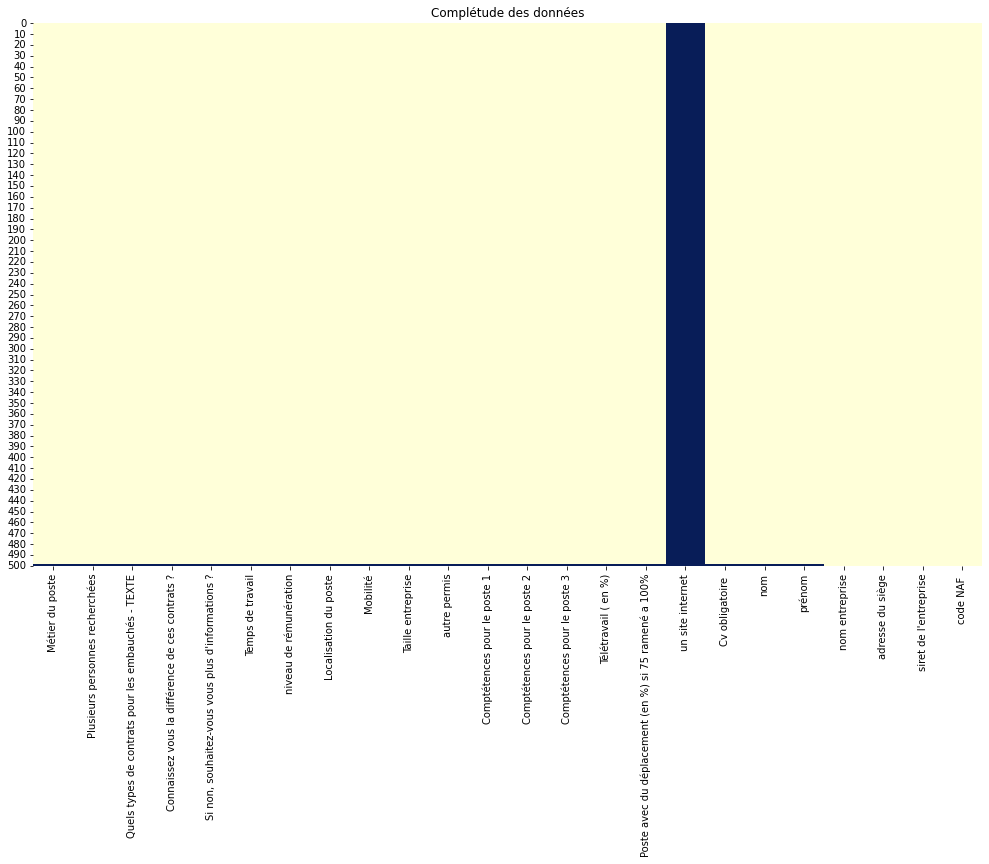

In [4]:
print('Jaune : Valeur présente\nBleu  : Valeur manquante')

plt.figure(figsize=(17, 10))
sns.heatmap(df_clt.isna(), cmap='YlGnBu', cbar=False)
plt.title('Complétude des données')
plt.show()

Affichons aussi le nombre de valeurs uniques par colonnes :

In [5]:
display(pd.DataFrame(df_clt.nunique(axis=0), columns=['Nombre de valeurs uniques']))

,Nombre de valeurs uniques
Métier du poste,120
Plusieurs personnes recherchées,2
Quels types de contrats pour les embauchés - TEXTE,22
Connaissez vous la différence de ces contrats ?,2
"Si non, souhaitez-vous vous plus d'informations ?",3
Temps de travail,4
niveau de rémunération,10
Localisation du poste,154
Mobilité,4
Taille entreprise,4


Nous pouvons voir que la colonne **`un site internet`** ne possède aucune information. Le visuel graphique nous permet de décider de la supprimer sans perte d'information. De plus, nous allons supprimer : 
- les colonnes :
    - **`nom`** et **`prénom`** par soucis d'anonymisation ;
    - **`siret de l'entreprise`** car elle est directement liée à la colonne **`nom entreprise`** et n'apporte donc aucune information ;
- les 2 dernières lignes qui contiennent principalement des valeurs manquantes.

Toutes les colonnes possèdant au moins 2 valeurs uniques, nous pouvons les conserver car elles apportent de l'information.

Notre jeu semble bien nettoyé quant à la complétude et valeur ajoutée statistique.

In [6]:
df_clt = df_clt.drop(['un site internet', 'nom', 'prénom', "siret de l'entreprise"], axis=1).iloc[:-2]
print('Nouvelles dimensions des données :\n- {} lignes (observations)\n- {} colonnes (variables)'.format(df_clt.shape[0],
                                                                                                         df_clt.shape[1]))

Nouvelles dimensions des données :
- 499 lignes (observations)
- 20 colonnes (variables)


**A FAIRE :** Cohérence

#### 3.1.2. Données jobbeurs <a class="anchor" id="3.1.2."></a>

Jaune : Valeur présente
Bleu  : Valeur manquante


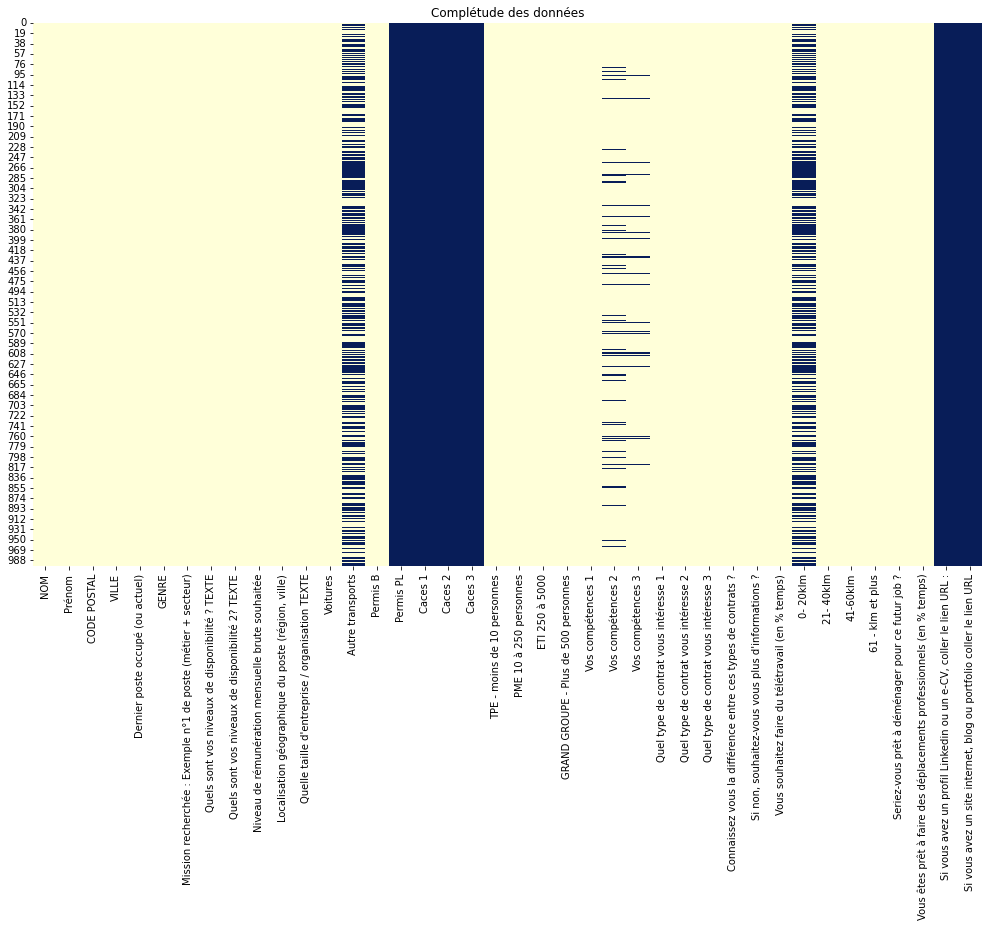

In [7]:
print('Jaune : Valeur présente\nBleu  : Valeur manquante')

plt.figure(figsize=(17, 10))
sns.heatmap(df_job.isna(), cmap='YlGnBu', cbar=False)
plt.title('Complétude des données')
plt.show()

Affichons aussi le nombre de valeurs uniques par colonnes :

In [8]:
display(pd.DataFrame(df_job.nunique(axis=0), columns=['Nombre de valeurs uniques']))

,Nombre de valeurs uniques
NOM,894
Prénom,540
CODE POSTAL,76
VILLE,231
Dernier poste occupé (ou actuel),176
GENRE,2
Mission recherchée : Exemple n°1 de poste (métier + secteur),176
Quels sont vos niveaux de disponibilité ? TEXTE,4
Quels sont vos niveaux de disponibilité 2? TEXTE,4
Niveau de rémunération mensuelle brute souhaitée,50


Nous pouvons voir que les colonnes **`Permis PL`**, **`Caces 1`**, **`Caces 2`**, **`Caces 3`**, **`Si vous avez un profil Linkedin ou un e-CV, coller le lien URL :`** et **`Si vous avez un site internet, blog ou portfolio coller le lien URL`** ne possèdent aucune information. Le visuel graphique nous permet de décider de les supprimer sans perte d'information. De plus, nous allons supprimer les colonnes **`NOM`** et **`Prénom`** par soucis d'anonymisation.

Nous pouvons aussi voir que les colonnes **`Quel type de contrat vous intéresse 1`** et **`0- 20klm`** ne possèdent qu'une valeur unique. Après réflexion sur leur utilité dans les données, nous choisissons de les supprimer car elle n'apporte aucune valeur statistique pour nos futurs calculs. Au contraire, elles pourraient rendre impossible certains calculs. On veillera avec de nouvelles données à les réintégrer afin d'en conserver l'information métier importante.

In [9]:
df_job = df_job.drop(['Permis PL', 'Caces 1', 'Caces 2', 'Caces 3', 
                      'Si vous avez un profil Linkedin ou un e-CV, coller le lien URL :', 
                      'Si vous avez un site internet, blog ou portfolio coller le lien URL', 
                      'NOM', 'Prénom', 'Quel type de contrat vous intéresse 1', '0- 20klm'], axis=1)
print('Nouvelles dimensions des données :\n- {} lignes (observations)\n- {} colonnes (variables)'.format(df_job.shape[0],
                                                                                                         df_job.shape[1]))

Nouvelles dimensions des données :
- 999 lignes (observations)
- 30 colonnes (variables)


On vérifie la cohérence variable/variable

In [10]:
display(sorted(df_job['VILLE'].unique()))

[' LEES ATHAS',
 'ABIDOS',
 'ABOS',
 'ACCOUS',
 'AICIRITS CAMOU SUHAST',
 'AIRE-SUR-LADOUR',
 'AMOU',
 'ANGAIS',
 'ANGLET',
 'ANNEMASSE',
 'ARANCE',
 'ARAUJUZON',
 'ARBOUCAVE',
 'ARBOUET-SUSSAUTE',
 'ARBUS',
 'ARESSY',
 'ARGAGNON',
 'ARNOS',
 'ARTHEZ DE BEARN',
 'ARTHEZ-DE-BEARN',
 'ARTHEZ-DE-BÉARN',
 'ARTIGUELOUVE',
 'ARTIX',
 'ARUDY',
 'ARZACQ-ARRAZIGUET',
 'ASSAT',
 'ATHOS ASPIS',
 'AUBARÈDE',
 'AUBERTIN',
 'AUDAUX',
 'AUDEJOS',
 'AURENSAN',
 'AUSSEVIELLE',
 'Aire sur lAdour',
 'BAIGTS-DE-BEARN',
 'BALANSUN',
 'BARBAZAN-DEBAT',
 'BARCUS',
 'BASSERCLES',
 'BASSOUES',
 'BAUDREIX',
 'BELLAC',
 'BELLOCQ',
 'BESINGRAND',
 'BIDOS',
 'BILLERE',
 'BILLÈRE',
 'BIRON',
 'BIZANOS',
 'BONNUT',
 'BORDES',
 'BOSTENS',
 'BOUCAU',
 'BOUGARBER',
 'BOUILLON',
 'BRIVE LA GAILLARDE',
 'BURGARONNE',
 'BUZY',
 'BÉSINGRAND',
 'CABIDOS',
 'CAMBO-LES-BAINS',
 'CAME',
 'CASTAIGNOS SOUSLENS',
 'CASTEIDE CAMI',
 'CASTEIDE-CAMI',
 'CASTEIDE-CANDAU',
 'CASTEL-SARRAZIN',
 'CASTELSARRASIN',
 'CASTETIS',
 'CASTETNA

In [11]:
df_job = fc.replace_string(df_job, 'VILLE', params['jobbeur'])
display(sorted(df_job['VILLE'].unique()))

['ABIDOS',
 'ABOS',
 'ACCOUS',
 'AICIRITS CAMOU SUHAST',
 'AIRE SUR LADOUR',
 'AIRE-SUR-LADOUR',
 'AMOU',
 'ANGAIS',
 'ANGLET',
 'ANNEMASSE',
 'ARANCE',
 'ARAUJUZON',
 'ARBOUCAVE',
 'ARBOUET-SUSSAUTE',
 'ARBUS',
 'ARESSY',
 'ARGAGNON',
 'ARNOS',
 'ARTHEZ DE BEARN',
 'ARTHEZ-DE-BEARN',
 'ARTIGUELOUVE',
 'ARTIX',
 'ARUDY',
 'ARZACQ-ARRAZIGUET',
 'ASSAT',
 'ATHOS ASPIS',
 'AUBAREDE',
 'AUBERTIN',
 'AUDAUX',
 'AUDEJOS',
 'AURENSAN',
 'AUSSEVIELLE',
 'BAIGTS-DE-BEARN',
 'BALANSUN',
 'BARBAZAN-DEBAT',
 'BARCUS',
 'BASSERCLES',
 'BASSOUES',
 'BAUDREIX',
 'BELLAC',
 'BELLOCQ',
 'BESINGRAND',
 'BIDOS',
 'BILLERE',
 'BIRON',
 'BIZANOS',
 'BONNUT',
 'BORDES',
 'BOSTENS',
 'BOUCAU',
 'BOUGARBER',
 'BOUILLON',
 'BRIVE LA GAILLARDE',
 'BURGARONNE',
 'BUZY',
 'CABIDOS',
 'CAMBO-LES-BAINS',
 'CAME',
 'CASTAIGNOS SOUSLENS',
 'CASTEIDE CAMI',
 'CASTEIDE-CAMI',
 'CASTEIDE-CANDAU',
 'CASTEL-SARRAZIN',
 'CASTELSARRASIN',
 'CASTETIS',
 'CASTETNAU-CAMBLONG',
 'CASTETNER',
 'CASTETS',
 'CASTILLON (CANTON DART

Dernier jobs :

In [12]:
display(sorted(df_job['Dernier poste occupé (ou actuel)'].dropna().unique()))

['AGENT ADMINISTRATIF',
 'AGENT D EXPLOITATION',
 'AGENT DE CLIENTELE',
 'AGENT DE NETTOYAGE',
 'AGENT DE NETTOYAGE INDUSTRIEL',
 'AGENT DE PRODUCTION',
 'AGENT DE SECURITE',
 'AGENT DE SURVEILLANCE',
 'AGENT DENTRETIEN',
 'AGENT DEXPLOITATION',
 'AGRICULTEUR',
 'AIDE CHARPENTIER',
 'AIDE MACON',
 'AIDE MENUISIER',
 'AIDE MONTEUR',
 'ANIMATRICE (teur)',
 'ASSISTANT',
 'ASSISTANT COMMERCIAL',
 'ASSITANTE COMMERCIALE',
 'Agent de Précontrainte',
 'Agent de production',
 'Agent dentretien',
 'BARDEUR',
 'BOUCHER',
 'CACES CARISTE 3',
 'CANALISATEUR VRD',
 'CARISTE',
 'CARISTE MAGASINIER',
 'CARRELEUR',
 'CARROSSIER PEINTRE',
 'CERCLEUR',
 'CHARPENTIER',
 'CHARPENTIER BOIS',
 'CHARPENTIER METAL',
 'CHAUDRONNIER',
 'CHAUDRONNIER SOUDEUR',
 'CHAUFFEUR',
 'CHAUFFEUR CAMION GRUE',
 'CHAUFFEUR CITERNES',
 'CHAUFFEUR DE BUS',
 'CHAUFFEUR PL',
 'CHAUFFEUR ROUTIER NATIONAL',
 'CHAUFFEUR SPL',
 'CHAUFFEUR TC',
 'CHAUFFEUR VL',
 'CHEF MONTEUR',
 'CONDITIONNEUR',
 'CONDITIONNEUSE',
 'CONDITIONNEUSE C